In [4]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

In [5]:
data = pd.read_csv('train.csv')
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [10]:
data.shape

(45211, 12)

# Cleaning

In [11]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

In [13]:
data = data.drop_duplicates()
data.shape

(45205, 12)

In [14]:
data.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
target             int64
dtype: object

In [16]:
data.describe()

,age,day,dur,num_calls,target
count,45205.000000,45205.00000,45205.000000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898,0.117000
std,10.619130,8.32234,257.538504,3.098189,0.321424
min,18.000000,1.00000,0.000000,1.000000,0.000000
25%,33.000000,8.00000,103.000000,1.000000,0.000000
50%,39.000000,16.00000,180.000000,2.000000,0.000000
75%,48.000000,21.00000,319.000000,3.000000,0.000000
max,95.000000,31.00000,4918.000000,63.000000,1.000000


### There are no null values, duplicates are removed, dataset is structured and is in right format. Right now we are not dealing with outliers.

# Exploratory Data Analysis

In [6]:
data['target'] = data['y'].map({'yes' : 1, 'no' : 0})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no,0


In [7]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

<AxesSubplot: ylabel='job'>

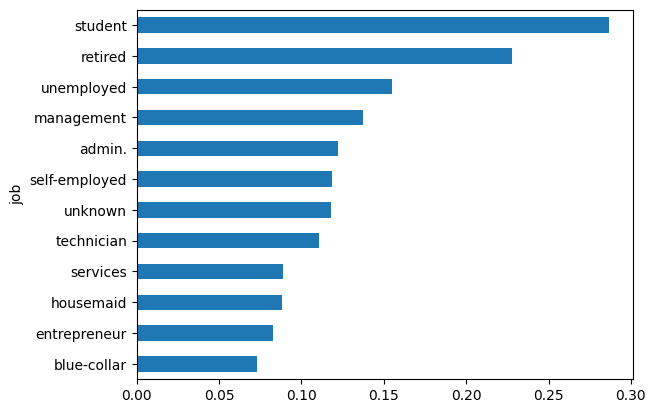

In [17]:
data.groupby('job')['target'].mean().sort_values().plot(kind = 'barh')

<AxesSubplot: ylabel='job'>

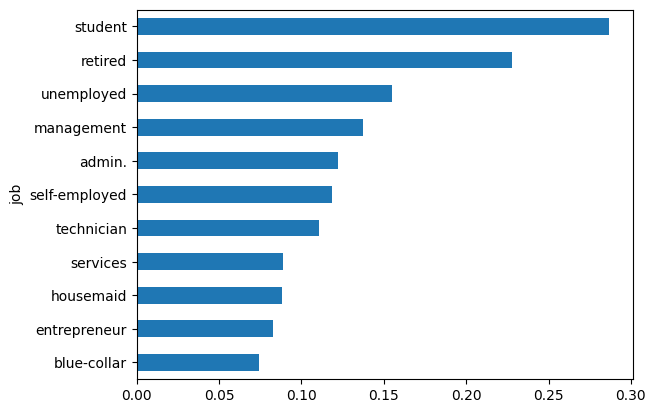

In [18]:
data['job'] = data['job'].replace('unknown', 'blue-collar')
data.groupby('job')['target'].mean().sort_values().plot(kind = 'barh')

In [19]:
data['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

<AxesSubplot: ylabel='marital'>

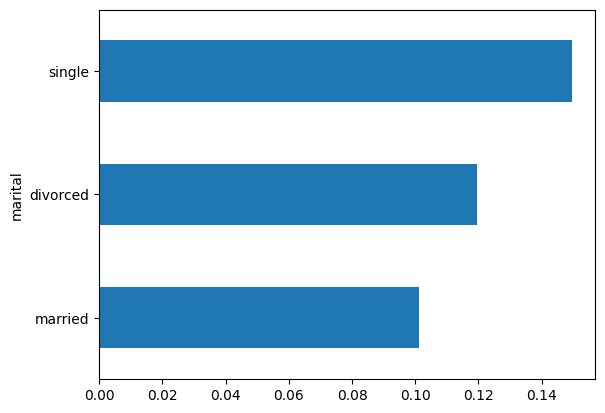

In [20]:
data.groupby('marital')['target'].mean().sort_values().plot(kind = 'barh')

In [21]:
data['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

<AxesSubplot: ylabel='education_qual'>

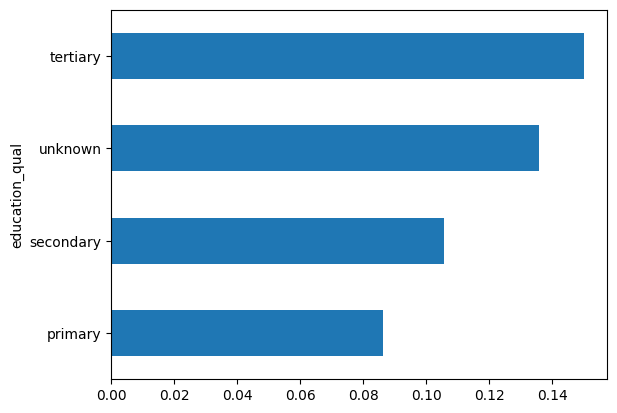

In [22]:
data.groupby('education_qual')['target'].mean().sort_values().plot(kind = 'barh')

<AxesSubplot: ylabel='education_qual'>

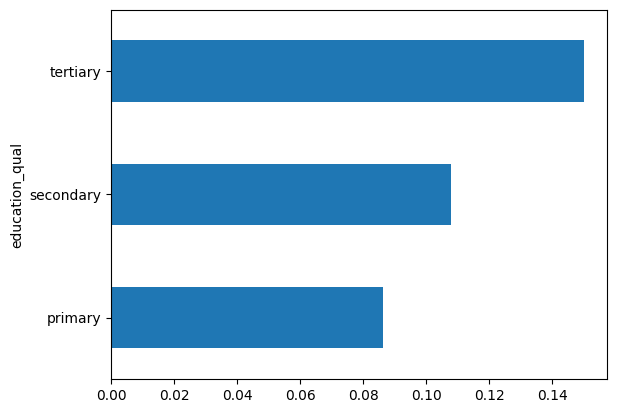

In [24]:
data['education_qual'] = data['education_qual'].replace('unknown', 'secondary')
data.groupby('education_qual')['target'].mean().sort_values().plot(kind = 'barh')

In [26]:
data['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

<AxesSubplot: ylabel='call_type'>

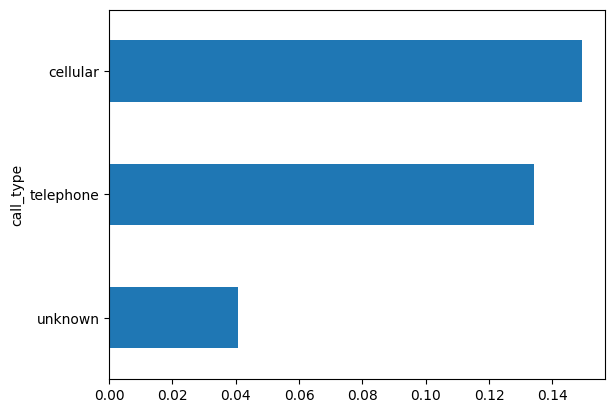

In [27]:
data.groupby('call_type')['target'].mean().sort_values().plot(kind = 'barh')

In [28]:
data['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

<AxesSubplot: ylabel='mon'>

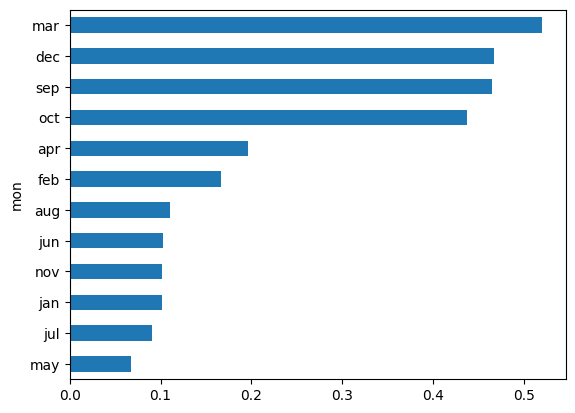

In [29]:
data.groupby('mon')['target'].mean().sort_values().plot(kind = 'barh')

In [30]:
data['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

<AxesSubplot: ylabel='prev_outcome'>

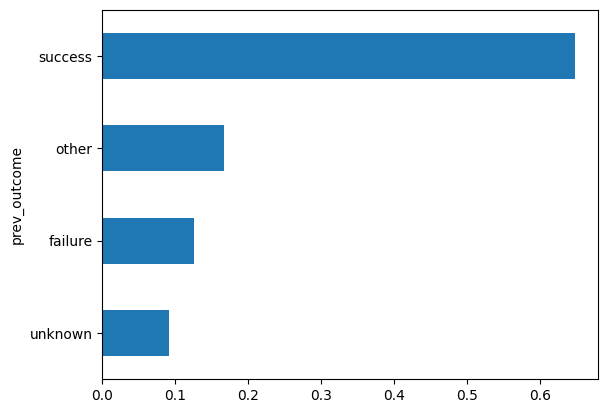

In [31]:
data.groupby('prev_outcome')['target'].mean().sort_values().plot(kind = 'barh')

### All the categories show an ordinal realtionship, for which we will be using label encoding. Most of the unknown values are imputed until unless they had more percentage in that category.

### Till here, cleaning is completed.

## Encoding

In [68]:
#job
data['job_enc'] = data['job'].map({'blue-collar' : 1, 'entrepreneur' : 2, 'housemaid' : 3, 'services' : 4, 'technician' : 5, 
                                  'self-employed' : 6, 'admin.' : 7, 'management' : 8, 'unemployed' : 9, 'retired' : 10, 
                                  'student' : 11})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc,education_enc,calltype_enc,month_enc,prev_outcome_enc,job_enc2,job_enc3
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0,8,1,3,1,5,1,8.0,NaN
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0,5,3,2,1,5,1,5.0,NaN
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0,2,1,2,1,5,1,2.0,NaN
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0,1,1,2,1,5,1,1.0,1.0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0,1,3,2,1,5,1,1.0,1.0


In [33]:
data['marital_enc'] = data['marital'].map({'married' : 1, 'divorced' : 2, 'single' : 3})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0,8.0,1
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0,5.0,3
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0,2.0,1
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0,1.0,1
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0,1.0,3


In [34]:
data['education_enc'] = data['education_qual'].map({'primary' : 1, 'secondary' : 2, 'tertiary' : 3})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc,education_enc
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0,8.0,1,3
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0,5.0,3,2
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0,2.0,1,2
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0,1.0,1,2
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0,1.0,3,2


In [35]:
data['calltype_enc'] = data['call_type'].map({'unknown' : 1, 'telephone' : 2, 'cellular' : 3})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc,education_enc,calltype_enc
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0,8.0,1,3,1
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0,5.0,3,2,1
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0,2.0,1,2,1
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0,1.0,1,2,1
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0,1.0,3,2,1


In [36]:
data['month_enc'] = data['mon'].map({'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8,
                                    'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc,education_enc,calltype_enc,month_enc
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0,8.0,1,3,1,5
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0,5.0,3,2,1,5
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0,2.0,1,2,1,5
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0,1.0,1,2,1,5
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0,1.0,3,2,1,5


In [37]:
data['prev_outcome_enc'] = data['prev_outcome'].map({'unknown' : 1, 'failure' : 2, 'other' : 3, 'success' : 4})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc,education_enc,calltype_enc,month_enc,prev_outcome_enc
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0,8.0,1,3,1,5,1
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0,5.0,3,2,1,5,1
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0,2.0,1,2,1,5,1
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0,1.0,1,2,1,5,1
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0,1.0,3,2,1,5,1


In [65]:
data['job_enc2'] = data['job'].map({'blue-collar' : int(1), 'entrepreneur' : int(2), 'housemaid' : int(3), 'services' : int(4), 'technician' : int(5), 
                                  'self-employed' : int(6), 'admin' : int(7), 'management' : int(8), 'unemployed' : int(9), 'retired' : int(10), 
                                  'student' : int(11)})
data['job_enc3'] = data['job'].map({'blue-collar' : 1})
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target,job_enc,marital_enc,education_enc,calltype_enc,month_enc,prev_outcome_enc,job_enc2,job_enc3
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no,0,8.0,1,3,1,5,1,8.0,NaN
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no,0,5.0,3,2,1,5,1,5.0,NaN
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no,0,2.0,1,2,1,5,1,2.0,NaN
3,47,blue-collar,married,secondary,unknown,5,may,92,1,unknown,no,0,1.0,1,2,1,5,1,1.0,1.0
4,33,blue-collar,single,secondary,unknown,5,may,198,1,unknown,no,0,1.0,3,2,1,5,1,1.0,1.0


In [76]:
#df = data['age', 'job_enc']
X = data[['age', 'job_enc', 'marital_enc', 'education_enc', 'calltype_enc', 'day', 'month_enc', 'dur', 'num_calls', 'prev_outcome_enc']].values
y = data['target']
X.shape
y.shape

(45205,)

In [88]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

In [89]:
from imblearn.combine import SMOTEENN

#plot_2d_space(X, y, 'Original Data')

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train, y_train)

#plot_2d_space(X_smt, y_smt, 'SMOTE + ENN links')

In [81]:
y_train.shape

(36164,)

In [80]:
y_smt.shape

(53138,)

In [82]:
X_train.shape

(36164, 10)

In [83]:
X_smt.shape

(53138, 10)

In [90]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_smt, y_smt) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [86]:
import warnings
warnings.filterwarnings('ignore')

Test set accuracy: 0.81
Test set auc: 0.79


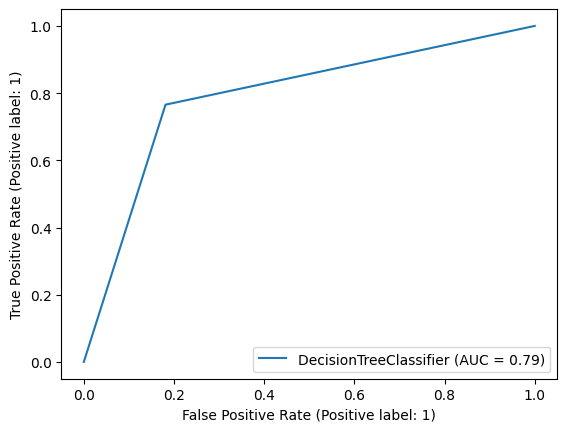

In [91]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
#y_pred = dt.predict(X_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)


In [138]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
    
    model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
    model.fit(X_smt,y_smt) #train the model
    #model.score(X_test, y_test) # scoring the model - r2 squared
    y_pred = model.predict(y_test)
    print("Learning rate : ", lr, " Train score : ", accuracy_score(y_test, y_pred), " Cross-Val score : ", np.mean(cross_val_score(model, X_smt, y_smt, cv=10)))

Learning rate :  0.01  Train score :  0.8829775467315563  Cross-Val score :  0.8975558164574238
Learning rate :  0.02  Train score :  0.8829775467315563  Cross-Val score :  0.9077927170848511
Learning rate :  0.03  Train score :  0.8829775467315563  Cross-Val score :  0.9161477925683801
Learning rate :  0.04  Train score :  0.8829775467315563  Cross-Val score :  0.9223577472099296


KeyboardInterrupt: 

Test set accuracy: 0.84
Test set auc: 0.83


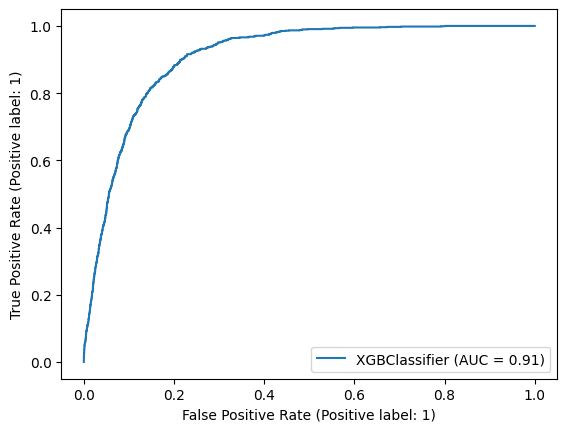

In [122]:
model = xgb.XGBClassifier(learning_rate = 0.6, n_estimators=100)
model.fit(X_smt,y_smt) #train the model


from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = model.predict(X_test) # Model's predictions

# Compute test set accuracy
acc2 = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc2))
acc3 = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc3))
plot_roc_curve(model, X_test, y_test)


In [129]:
from xgboost import XGBClassifier
np.mean(cross_val_score(XGBClassifier(learning_rate = 1, n_estimators = 100), X_smt, y_smt, cv = 10))

0.966504772179206

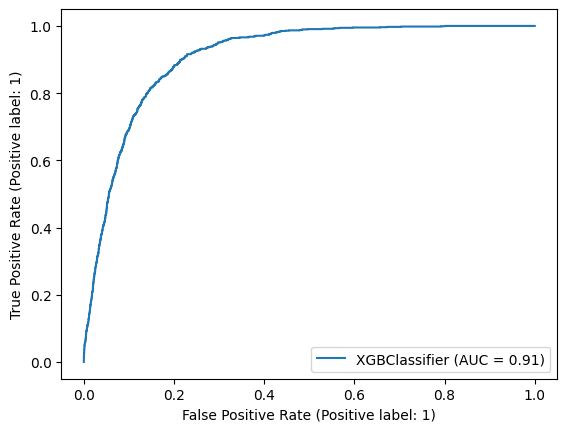

In [135]:
s = XGBClassifier(learning_rate = 0.6, n_estimators = 100)
s.fit(X_smt, y_smt)
y_p = s.predict(y_test)
plot_roc_curve(s, X_test, y_test)